In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import warnings as warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[20,10]

In [2]:
trdata=pd.read_csv("train.csv")

In [3]:
tedata=pd.read_csv("test.csv")

In [4]:
trdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trdata.shape

(891, 12)

In [6]:
tedata.shape

(418, 11)

In [7]:
combined=pd.concat([trdata,tedata],ignore_index=False,sort=False)

In [8]:
combined.shape

(1309, 12)

In [9]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
numcolumns=combined.select_dtypes(include=np.number).columns
numcolumns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

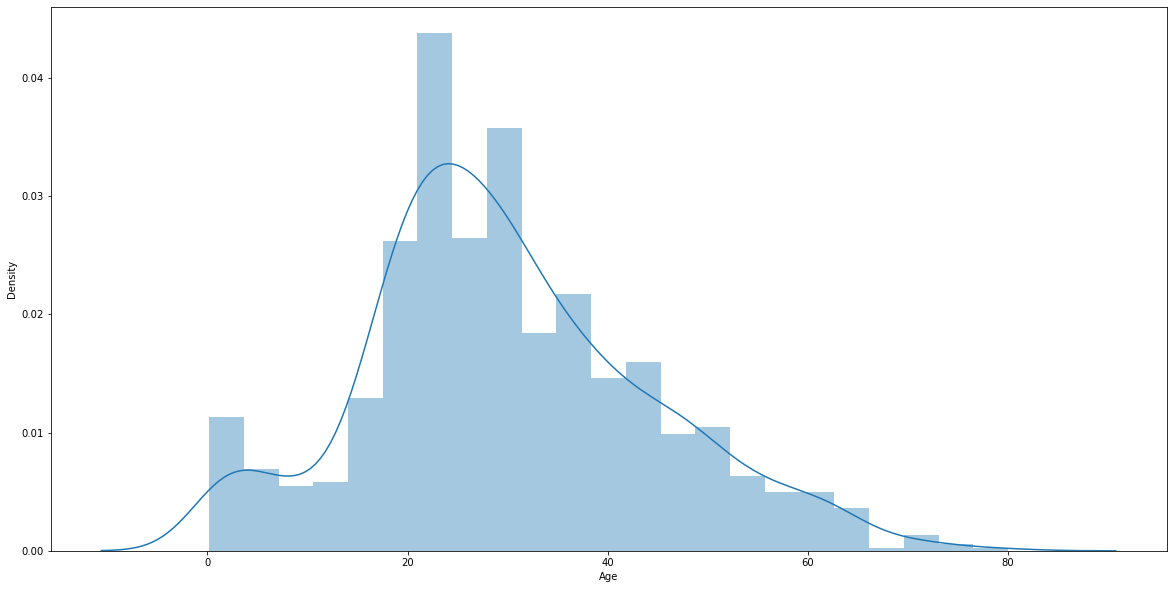

In [11]:
sns.distplot(combined.Age.dropna())

In [12]:
combined.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

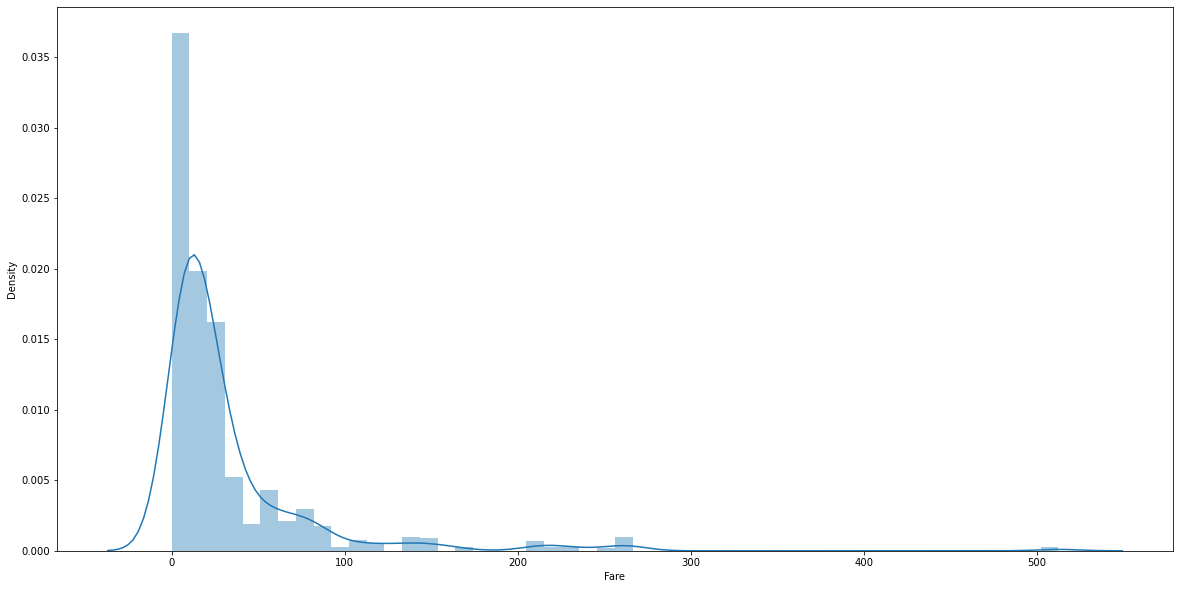

In [13]:
sns.distplot(combined.Fare.dropna())

In [14]:
combined.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [15]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

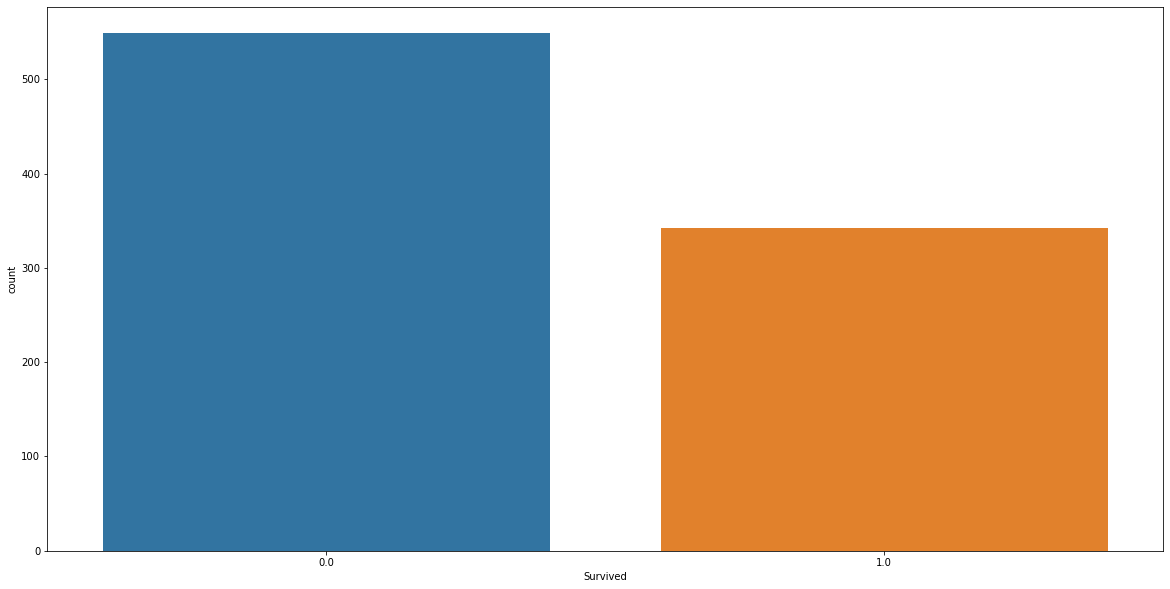

In [16]:
sns.countplot(combined.Survived)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

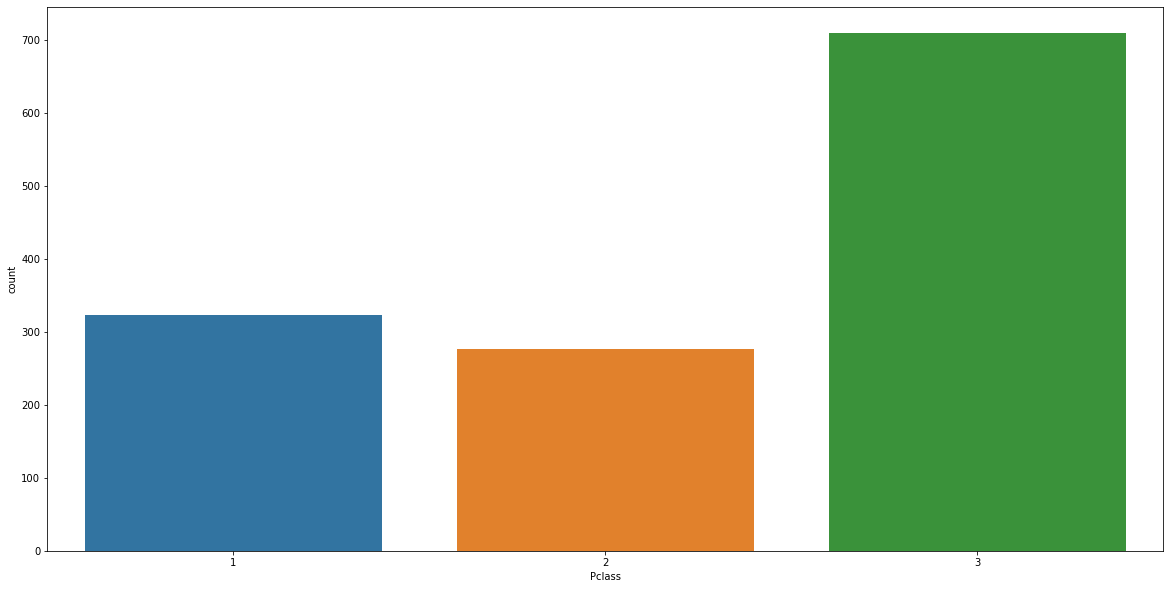

In [17]:
sns.countplot(combined.Pclass)
#there were lot of passenger in class 3 there fore high possibility that people max died 

<AxesSubplot:xlabel='Sex', ylabel='count'>

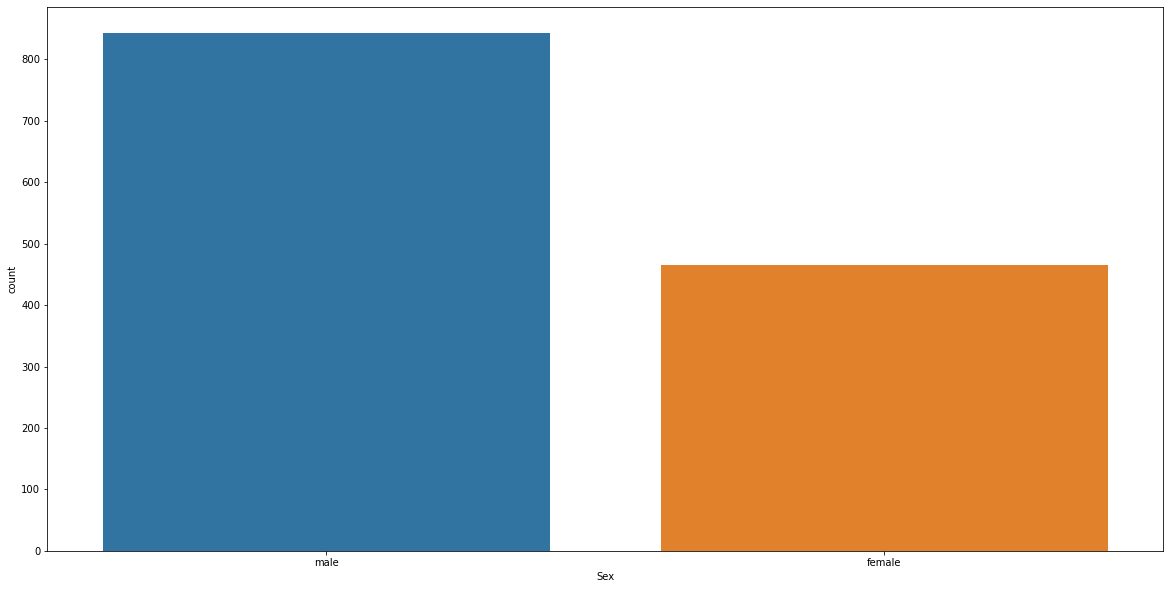

In [18]:
sns.countplot(combined.Sex)

In [19]:
#number of female are less then man

<AxesSubplot:xlabel='SibSp', ylabel='count'>

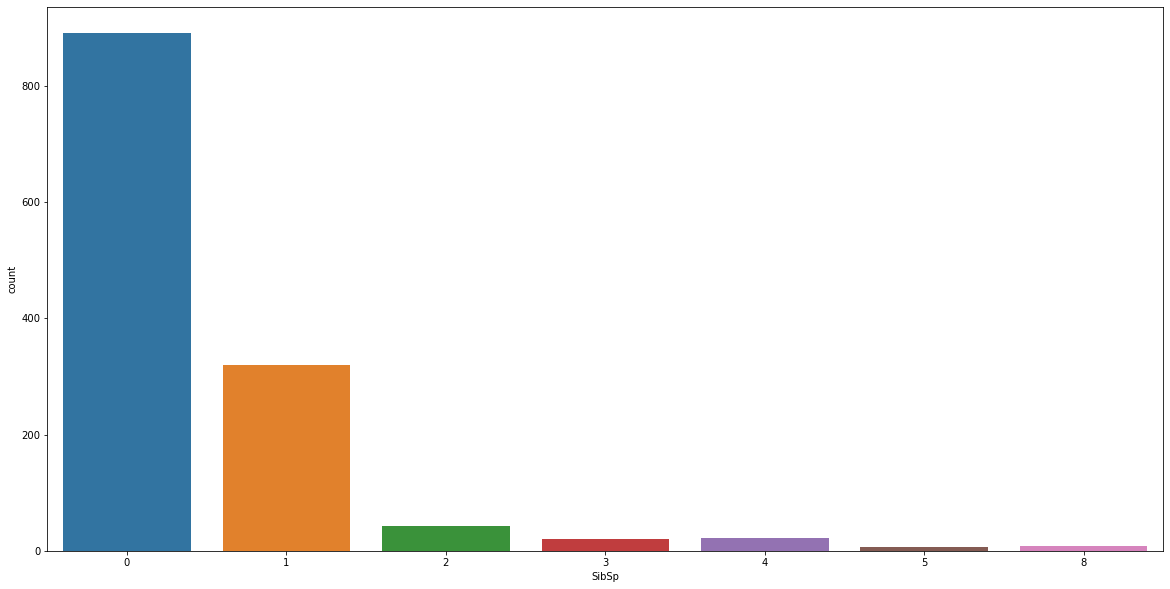

In [20]:
sns.countplot(combined.SibSp)
#most of people travelled 

<AxesSubplot:xlabel='Parch', ylabel='count'>

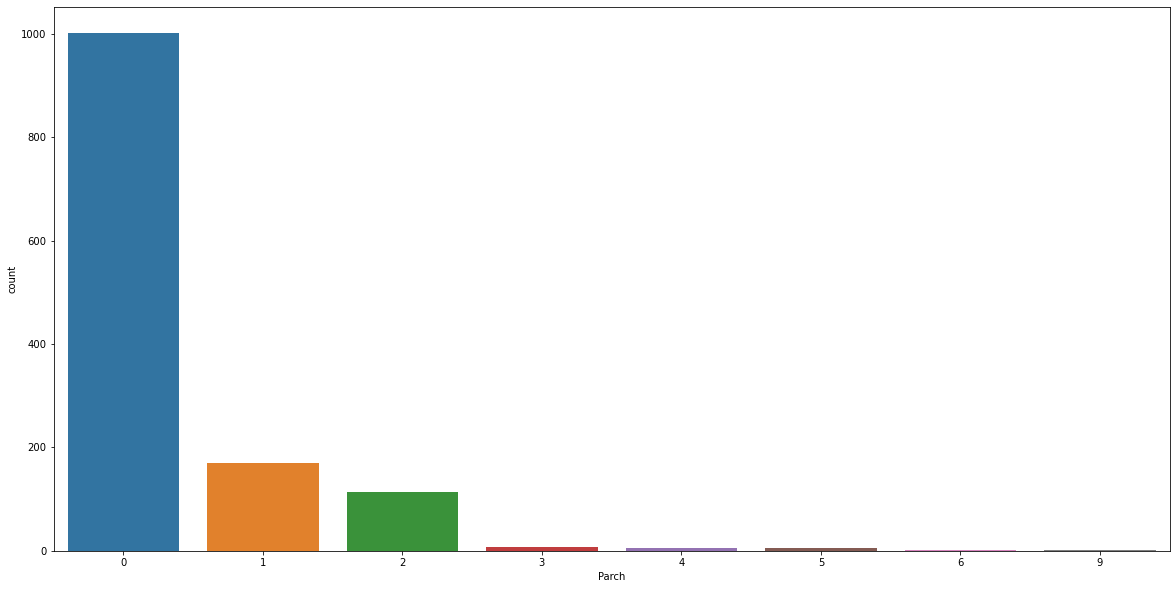

In [21]:
sns.countplot(combined.Parch)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

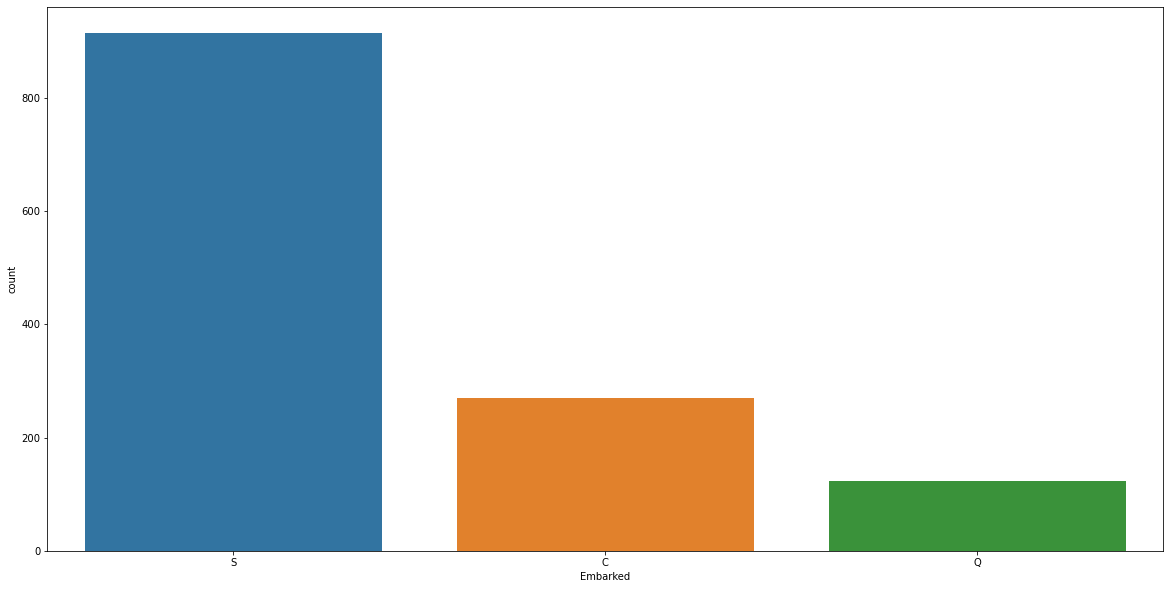

In [22]:
sns.countplot(combined. Embarked)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

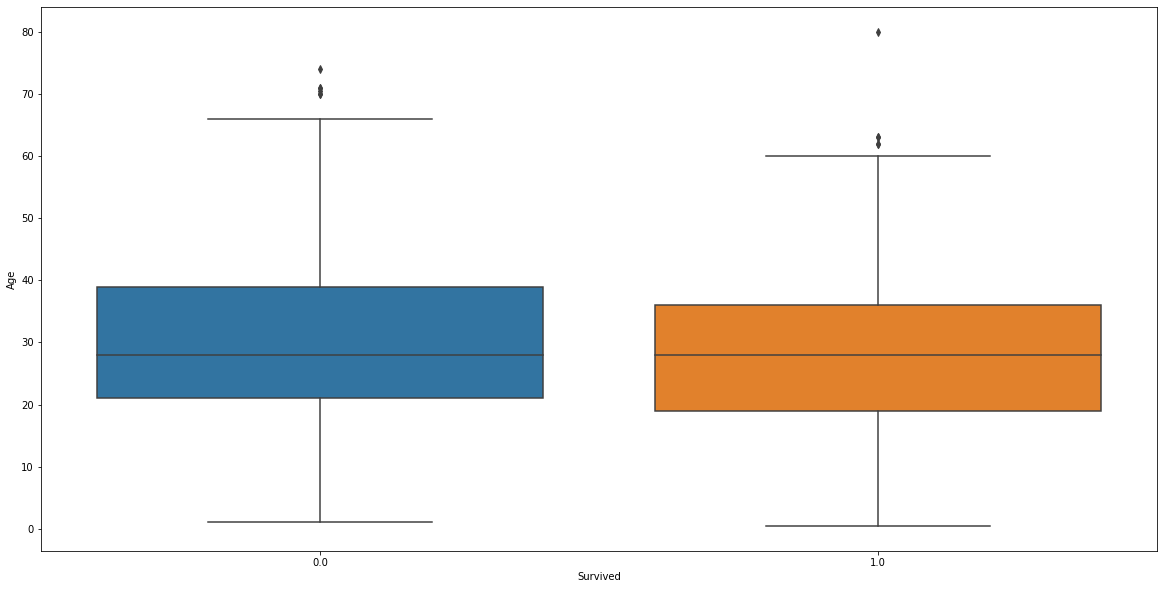

In [23]:
###Bivarient analysis
#age vs survived
sns.boxplot(y=combined.Age,x=combined.Survived)

people who didnot survive have a higher range of age value

In [24]:
#find statical summary
combined.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [25]:
combined.groupby("Survived")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1.0,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


#cat vs cat
*survided vs pclass

<AxesSubplot:xlabel='Pclass'>

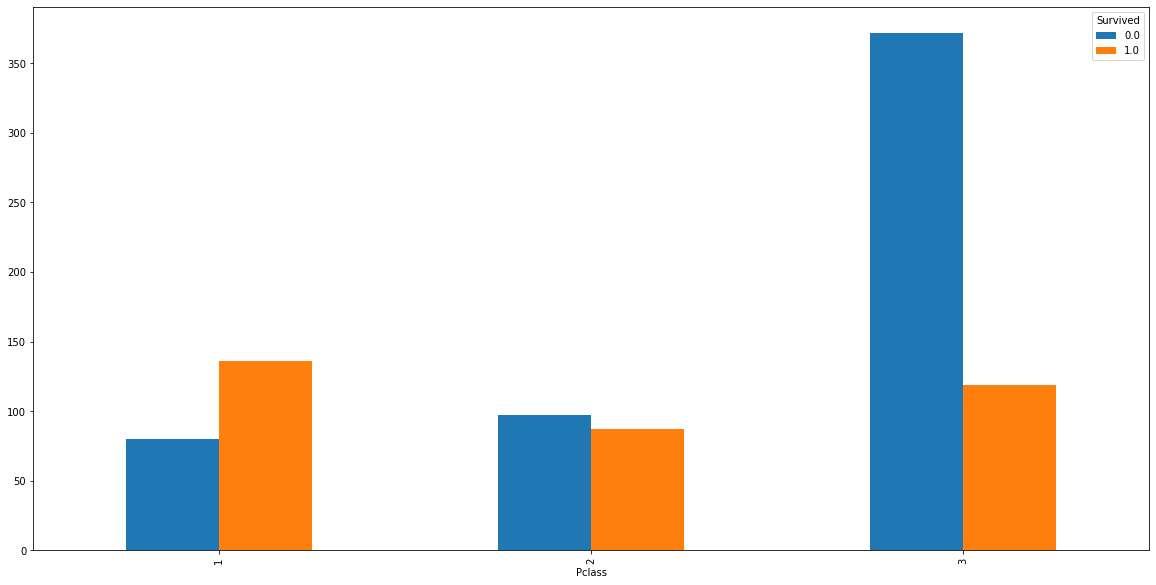

In [26]:
tb1 =pd.crosstab(combined.Pclass,combined.Survived)
tb1.plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

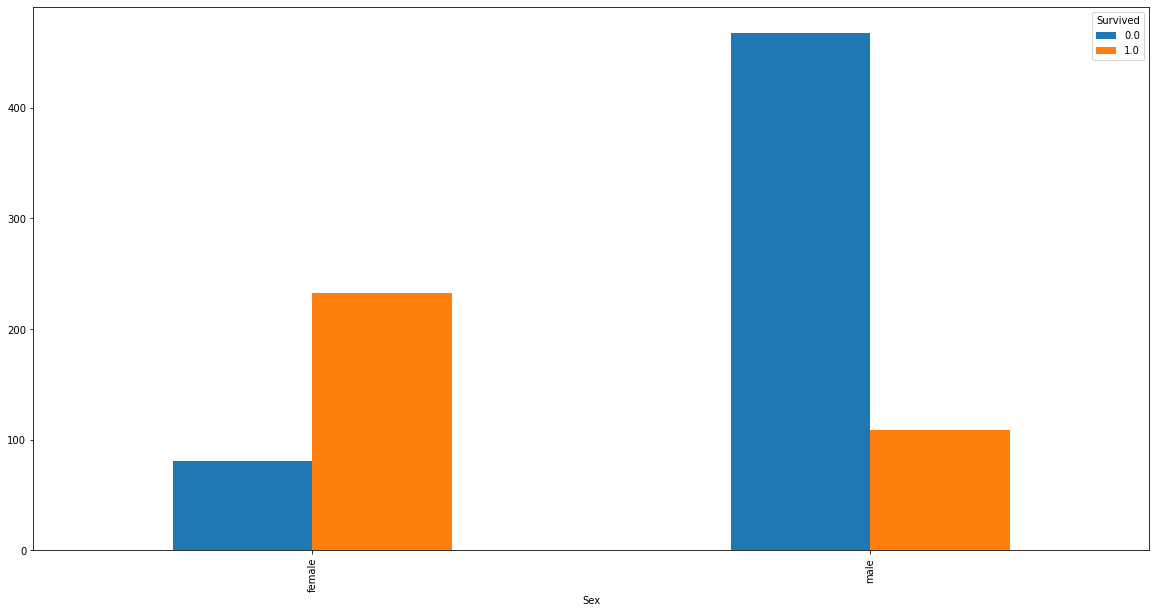

In [27]:
tb2 =pd.crosstab(combined.Sex,combined.Survived)
tb2.plot(kind='bar')

<AxesSubplot:xlabel='SibSp'>

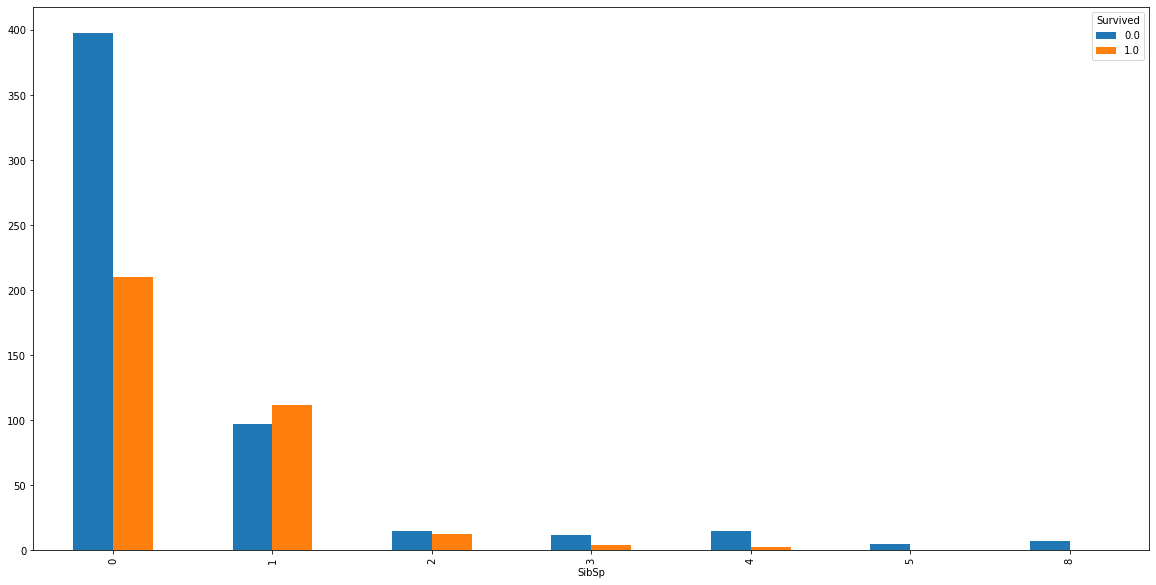

In [28]:
tb3 =pd.crosstab(combined.SibSp,combined.Survived)
tb3.plot(kind='bar')


In [29]:
combined['family']=combined.SibSp+combined.Parch+1

<AxesSubplot:xlabel='family'>

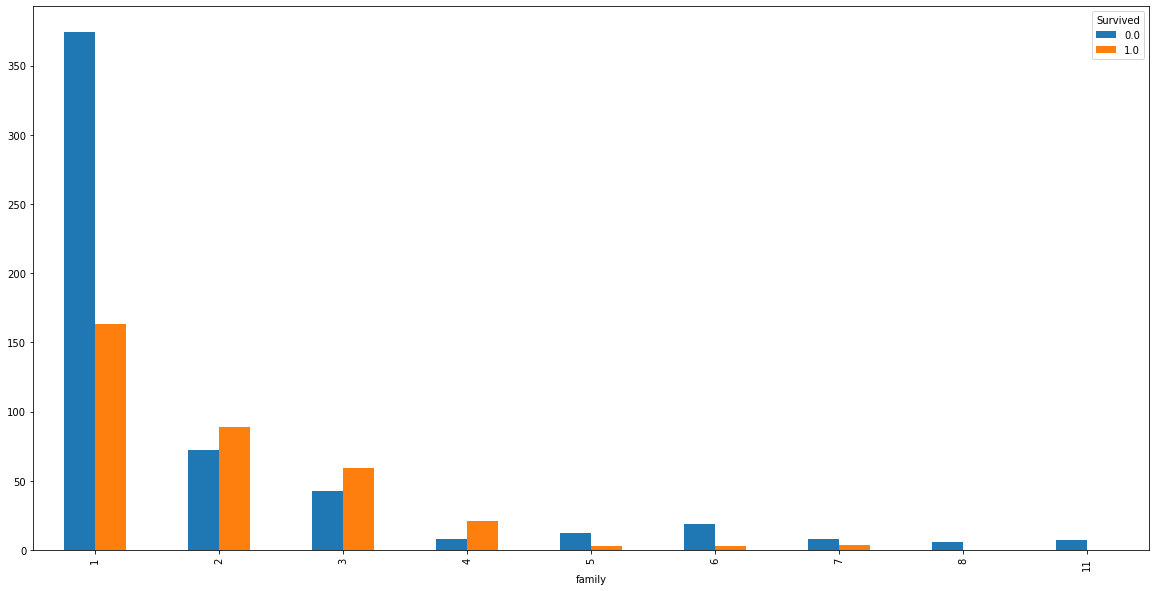

In [30]:
tb4 =pd.crosstab(combined.family,combined.Survived)
tb4.plot(kind='bar')

<AxesSubplot:xlabel='Parch'>

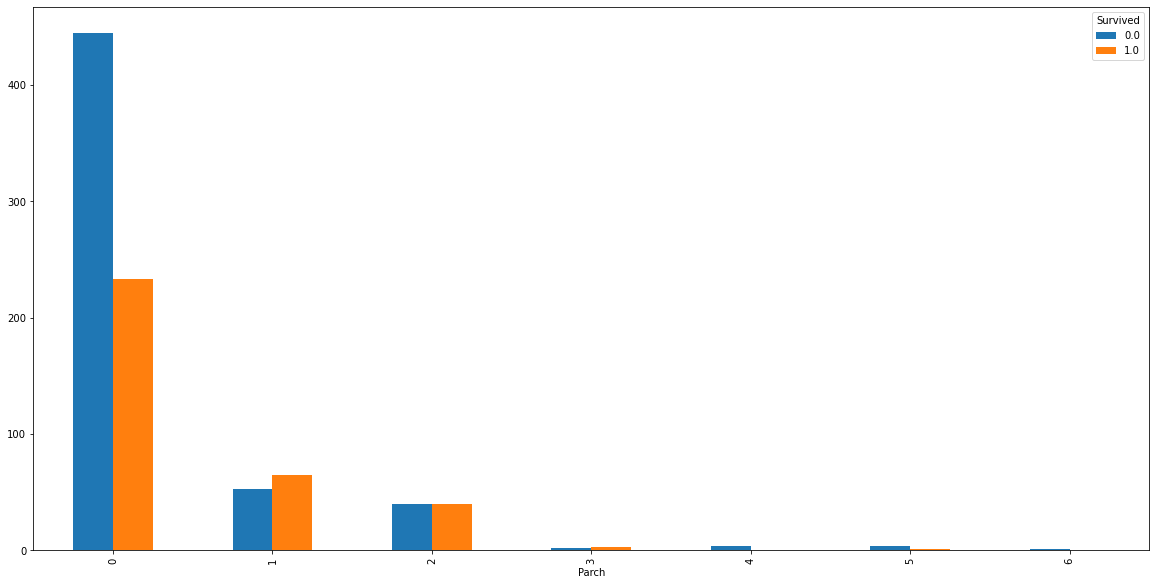

In [31]:
tb5 =pd.crosstab(combined.Parch,combined.Survived)
tb5.plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

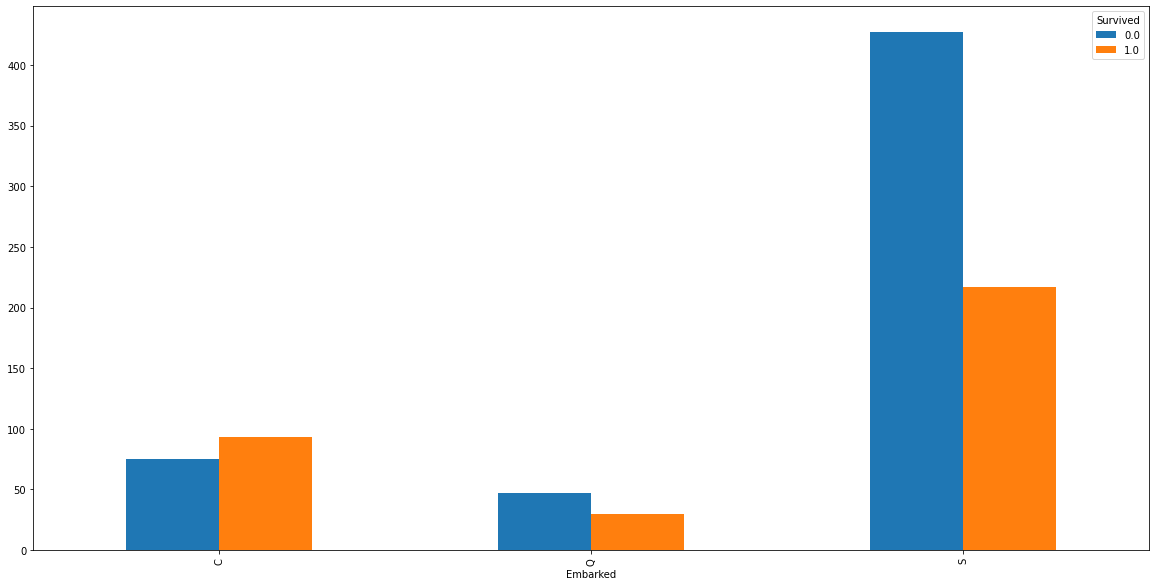

In [32]:
tb6 =pd.crosstab(combined.Embarked,combined.Survived)
tb6.plot(kind='bar')

In [33]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


inferences drown
people from s and c have better chance of survive
passenger from class 1 have better survival
people who paid more have more chance of survival
people with larger family have lower survival ratio

## FEATURE ENGINEERING

In [34]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
family            0
dtype: int64

In [35]:
def func(x):
    if x is np.nan:
        return 'cabinmissing'
    else:
        return 'cabinpresent'
combined.Cabin=combined.Cabin.apply(func )    

In [36]:
combined.Cabin.unique()

array(['cabinmissing', 'cabinpresent'], dtype=object)

In [37]:
names=combined.Name.transform(lambda x:x.split(', ')[1])
title=names.apply(lambda x:x.split('. ')[0])
combined['title']=pd.Series(title)

In [38]:
(combined.title.unique())

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [39]:
titles_ignore=[ 'Don', 'Rev', 'Dr', 'Mme',
        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt',
       'the Countess', 'Jonkheer', 'Dona']

In [40]:
def title(x):
    if x in titles_ignore:
        return ("others")
    else:
        return x
    

In [41]:
combined['title']=combined.title.apply(title)

In [42]:
combined.Age.describe(),combined.groupby("title")['Age'].describe()

(count    1046.000000
 mean       29.881138
 std        14.413493
 min         0.170000
 25%        21.000000
 50%        28.000000
 75%        39.000000
 max        80.000000
 Name: Age, dtype: float64,
         count       mean        std    min   25%   50%   75%   max
 title                                                             
 Master   53.0   5.482642   4.161554   0.33   2.0   4.0   9.0  14.5
 Miss    210.0  21.774238  12.249077   0.17  15.0  22.0  30.0  63.0
 Mr      581.0  32.252151  12.422089  11.00  23.0  29.0  39.0  80.0
 Mrs     170.0  36.994118  12.901767  14.00  27.0  35.5  46.5  76.0
 Ms        1.0  28.000000        NaN  28.00  28.0  28.0  28.0  28.0
 others   31.0  43.129032  12.309189  23.00  32.5  45.0  52.5  70.0)

In [43]:
combined.loc[(combined.title=='Master')& (combined.Age.isnull()),"Age"]=4.0 

In [44]:
combined.loc[(combined.title=='Miss')&(combined.Age.isnull()),"Age"]=22.0

In [45]:
combined.loc[(combined.title=='Mr')&(combined.Age.isnull()),"Age"]= 29.0 

In [46]:
combined.loc[(combined.title=='Mrs')&(combined.Age.isnull()),"Age"]= 35.5 

In [47]:
combined.loc[(combined.title=='Ms')&(combined.Age.isnull()),"Age"]= 28.0 

In [48]:
combined.loc[(combined.title=='others')&(combined.Age.isnull()),"Age"]= 45.0 

In [49]:
combined.loc[combined.Embarked.isnull(),'Embarked']="S"

In [50]:
combined.loc[combined.Fare.isnull(),'Fare']=combined.Fare.mean()

In [51]:
newcombined=combined.drop(columns=['Ticket','PassengerId','Name','SibSp','Parch'])

In [52]:
newcombined.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
family        0
title         0
dtype: int64

In [53]:
def functfam (x):
    if x ==1:
        return 'traveling alone'
    elif x<=3 :
        return "small family"
    else:
        return "large family"

In [54]:
newcombined.family=newcombined.family.apply(functfam)

## What is data leakage
* if we scale the data before splitting the chances are the model will be able to get a preview of the test data
*

In [55]:
ntrdata=newcombined.iloc[0:trdata.shape[0],:]
ntedata=newcombined.iloc[trdata.shape[0]:,:]

In [56]:
ntedata.drop(columns='Survived',inplace=True)

In [57]:
ntrdata.shape,ntedata.shape

((891, 9), (418, 8))

In [58]:
newcombined.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'family', 'title'],
      dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc=StandardScaler()


In [61]:
df=pd.DataFrame(sc.fit_transform(ntrdata.loc[:,["Age","Fare"]]),columns=['agescaled','farescaled'])

In [62]:
ntrdata['Age']=df.agescaled

In [63]:
ntrdata['Fare']=df.farescaled

In [64]:
ntrdata

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family,title
0,0.0,3,male,-0.552307,-0.502445,cabinmissing,S,small family,Mr
1,1.0,1,female,0.657044,0.786845,cabinpresent,C,small family,Mrs
2,1.0,3,female,-0.249969,-0.488854,cabinmissing,S,traveling alone,Miss
3,1.0,1,female,0.430291,0.420730,cabinpresent,S,small family,Mrs
4,0.0,3,male,0.430291,-0.486337,cabinmissing,S,traveling alone,Mr
...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,-0.174385,-0.386671,cabinmissing,S,traveling alone,others
887,1.0,1,female,-0.779060,-0.044381,cabinpresent,S,traveling alone,Miss
888,0.0,3,female,-0.552307,-0.176263,cabinmissing,S,large family,Miss
889,1.0,1,male,-0.249969,-0.044381,cabinpresent,C,traveling alone,Mr


In [65]:
df1=pd.DataFrame(sc.transform(ntedata.loc[:,["Age","Fare"]]),columns=['agescaled','farescaled'])

In [66]:
ntedata['Age']=df1.agescaled

In [67]:
ntedata['Fare']=df1.farescaled

In [68]:
dc=pd.get_dummies(ntrdata,drop_first=True)

In [69]:
dc

,Survived,Pclass,Age,Fare,Sex_male,Cabin_cabinpresent,Embarked_Q,Embarked_S,family_small family,family_traveling alone,title_Miss,title_Mr,title_Mrs,title_Ms,title_others
0,0.0,3,-0.552307,-0.502445,1,0,0,1,1,0,0,1,0,0,0
1,1.0,1,0.657044,0.786845,0,1,0,0,1,0,0,0,1,0,0
2,1.0,3,-0.249969,-0.488854,0,0,0,1,0,1,1,0,0,0,0
3,1.0,1,0.430291,0.420730,0,1,0,1,1,0,0,0,1,0,0
4,0.0,3,0.430291,-0.486337,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,-0.174385,-0.386671,1,0,0,1,0,1,0,0,0,0,1
887,1.0,1,-0.779060,-0.044381,0,1,0,1,0,1,1,0,0,0,0
888,0.0,3,-0.552307,-0.176263,0,0,0,1,0,0,1,0,0,0,0
889,1.0,1,-0.249969,-0.044381,1,1,0,0,0,1,0,1,0,0,0


In [70]:
ntedata

,Pclass,Sex,Age,Fare,Cabin,Embarked,family,title
0,3,male,0.392499,-0.490783,cabinmissing,Q,traveling alone,Mr
1,3,female,1.337305,-0.507479,cabinmissing,S,small family,Mrs
2,2,male,2.471071,-0.453367,cabinmissing,Q,traveling alone,Mr
3,3,male,-0.174385,-0.474005,cabinmissing,S,traveling alone,Mr
4,3,female,-0.552307,-0.401017,cabinmissing,S,small family,Mrs
...,...,...,...,...,...,...,...,...
413,3,male,-0.023216,-0.486337,cabinmissing,S,traveling alone,Mr
414,1,female,0.732629,1.544246,cabinpresent,C,traveling alone,others
415,3,male,0.694837,-0.502445,cabinmissing,S,traveling alone,Mr
416,3,male,-0.023216,-0.486337,cabinmissing,S,traveling alone,Mr
